### Преобразование и анализ данных

In [1]:
import numpy as np
import pandas as pd  # Для работы с данными
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('athletes.csv')
data.head(15)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [4]:
# удаляем ячейки с отсутствием данных
data = data[~(data['height'].isna())]
data = data[~(data['weight'].isna())]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [6]:
data.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [7]:
data.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

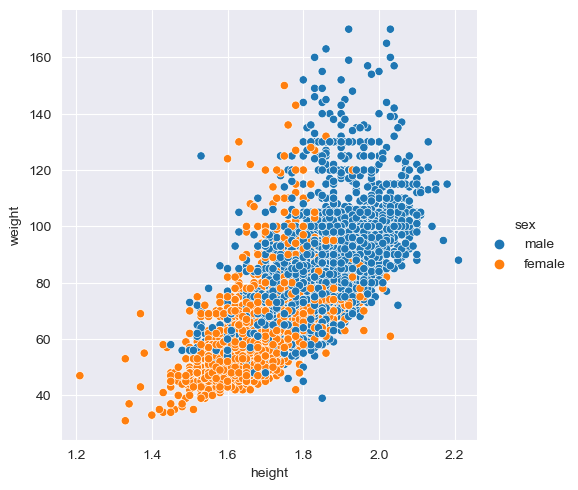

In [8]:
sns.relplot(x="height",y="weight",hue="sex",data=data)

In [9]:
from datetime import datetime

def calculate_age(birthdate):
    reference_date = datetime.strptime('8/15/16', '%m/%d/%y')
    birthdate = datetime.strptime(birthdate, '%m/%d/%y')

    birth_year = birthdate.year
    birth_month = birthdate.month
    birth_day = birthdate.day

    # Коррекция для двузначных годов
    if birth_year > 2016:
        birth_year -= 100

    age = reference_date.year - birth_year - ((reference_date.month, reference_date.day) < (birth_month, birth_day))
    return age

# Применяем функцию calculate_age ко всем значениям в колонке "dob"
data['age'] = data['dob'].apply(calculate_age)

data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,46
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,29
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,24
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,25
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,25


In [10]:
data.age.describe()

count    10858.000000
mean        26.449622
std          5.396390
min         13.000000
25%         23.000000
50%         26.000000
75%         29.000000
max         62.000000
Name: age, dtype: float64

In [11]:
data.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze', 'age'],
      dtype='object')

In [12]:
data = data.drop('dob', axis=1)

In [13]:
data.groupby('nationality').nationality.count().sum()

10858

In [14]:
data.nationality.value_counts().head()

USA    552
BRA    466
GER    435
AUS    410
FRA    398
Name: nationality, dtype: int64

In [15]:
data_nationality = data['nationality']

In [16]:
import seaborn as sns

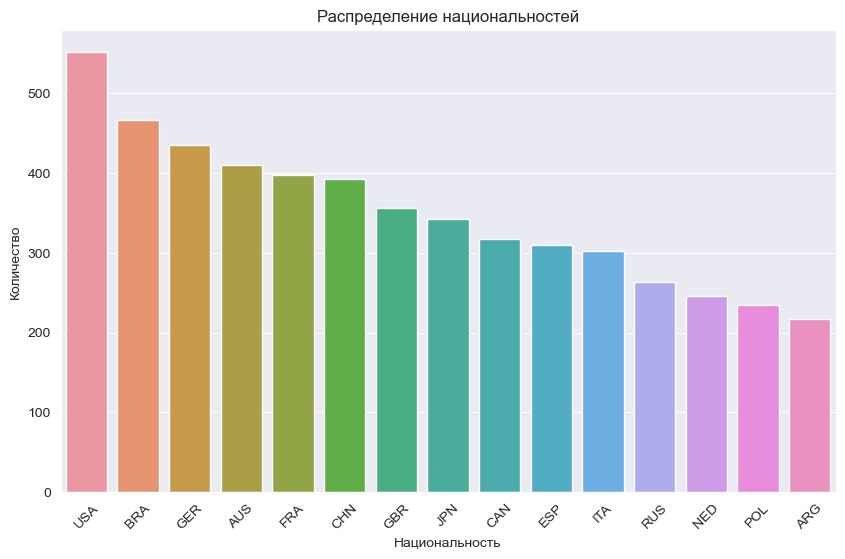

In [17]:
nationality_counts = data['nationality'].value_counts()

# Создаем график с использованием библиотеки Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=nationality_counts.index[:15], y=nationality_counts.values[:15])
plt.title('Распределение национальностей')
plt.xlabel('Национальность')
plt.ylabel('Количество')
plt.xticks(rotation=45)  # Поворот подписей на оси X
plt.show()

Конечно, красиво, но национальностей у нас около 200, так что это признак ничего нам не даст 

In [18]:
data.head()

,id,name,nationality,sex,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,1.72,64.0,athletics,0,0,0,46
1,532037425,A Lam Shin,KOR,female,1.68,56.0,fencing,0,0,0,29
2,435962603,Aaron Brown,CAN,male,1.98,79.0,athletics,0,0,1,24
3,521041435,Aaron Cook,MDA,male,1.83,80.0,taekwondo,0,0,0,25
4,33922579,Aaron Gate,NZL,male,1.81,71.0,cycling,0,0,0,25


В ходе пробных оценок точности было выявлено, что переменная age только путает модель, так что не будем ее использовать(

In [19]:
selected_columns = data[['height', 'weight', 'sport', 'sex']]

In [20]:
data.sport.value_counts().head()

athletics    2187
aquatics     1396
football      583
rowing        535
cycling       502
Name: sport, dtype: int64

In [21]:
selected_columns.head()

,height,weight,sport,sex
0,1.72,64.0,athletics,male
1,1.68,56.0,fencing,female
2,1.98,79.0,athletics,male
3,1.83,80.0,taekwondo,male
4,1.81,71.0,cycling,male


In [22]:
# столбец sport - категориальная переменная (не путать с континуальными)
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies(selected_columns, columns=['sport'])
# столбец sex является целевой переменной, удаляем его из Х
del X['sex']

print('Пометили вид спорта спортсмена единичкой.')
X.head()

Пометили вид спорта спортсмена единичкой.


,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['sex'])
y = pd.Series(data=le.transform(selected_columns['sex']))
y.head()


0    1
1    0
2    1
3    1
4    1
dtype: int64

In [24]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [27]:
predictions

array([1, 1, 0, ..., 1, 0, 1])

In [28]:
model.predict_proba(X_test)

array([[0.28589949, 0.71410051],
       [0.06451949, 0.93548051],
       [0.79827211, 0.20172789],
       ...,
       [0.01406079, 0.98593921],
       [0.91335517, 0.08664483],
       [0.28002505, 0.71997495]])

In [29]:
model.score(X_train, y_train)

0.8153350218742804

In [30]:
model.score(X_test, y_test)

0.8103130755064457

In [31]:
from sklearn.metrics import roc_curve, auc

In [32]:
y_pred = model.predict_proba(X_test)

In [33]:
# Вычисляем ROC-кривую и площадь под кривой (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

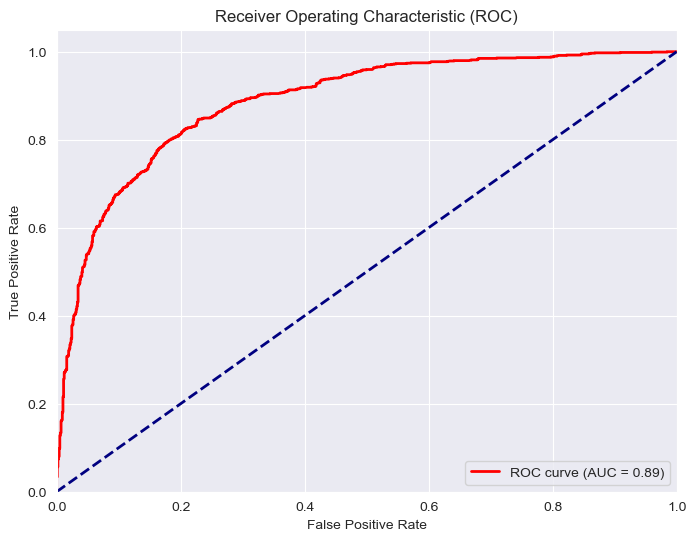

In [34]:
# Строим ROC-кривую
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [35]:
from sklearn.metrics import roc_auc_score

In [36]:
roc_auc = roc_auc_score(y_test, y_pred[:, 1])

In [37]:
roc_auc

0.8860312987599573

In [38]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

for predicted_prob, actual in zip(y_pred[:, 1], y_test):
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1

    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [39]:
tp, fp, fn, tn

(979, 203, 209, 781)

In [40]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.8103130755064457

In [41]:
precision = tp / (tp + fp)
precision

0.8282571912013537

In [42]:
recall = tp / (tp + fn)
recall

0.8240740740740741

In [43]:
# Вычисляем F1-меру
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

0.8261603375527427

In [44]:
# Создаем список порогов (замените на свои значения)
thresholds = np.linspace(1, 0, 101)

In [45]:
thresholds

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01, 0.  ])

In [46]:
score = np.array(y_pred[:, 1])
y = np.array(y_test)

# false positive rate
FPR = []
# true positive rate
TPR = []
# Iterate thresholds from 0.0 to 1.0
thresholds = np.arange(0.0, 1.01, 0.1)
# array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

# get number of positive and negative examples in the dataset
P = sum(y)
N = len(y) - P

# iterate through all thresholds and determine fraction of true positives
# and false positives found at this threshold
for thresh in thresholds:
    FP=0
    TP=0
    thresh = round(thresh,2) #Limiting floats to two decimal points
    # можно брать максимальные значения score, но так как у нас 2000+ значений, то это бессмысленно
    for i in range(len(score)):
        if (score[i] >= thresh):
            if y[i] == 1:
                TP = TP + 1
            if y[i] == 0:
                FP = FP + 1
    FPR.append(FP/N)
    TPR.append(TP/P)

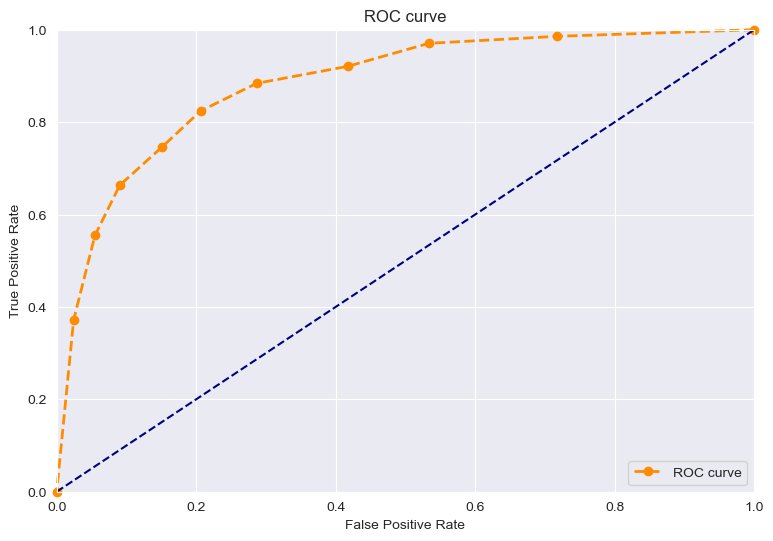

In [47]:
plt.figure(figsize=(9, 6))
plt.plot(FPR, TPR, linestyle='--', marker='o', color='darkorange', lw = 2, label='ROC curve', clip_on=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Чем реже изменяется трешхолд, тем больше точек на графике будем видеть

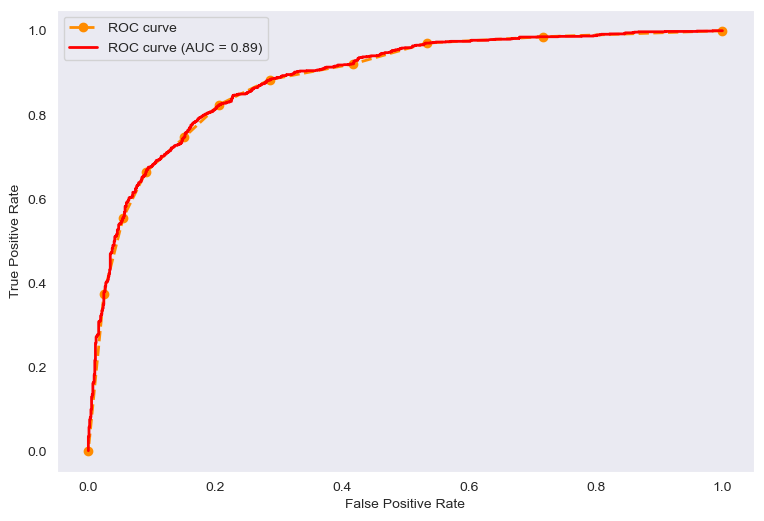

In [48]:
plt.figure(figsize=(9, 6))
plt.plot(FPR, TPR, linestyle='--', marker='o', color='darkorange', lw = 2, label='ROC curve', clip_on=False)
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.grid()
plt.show()

Замечаем, что ROC, построенная sklearn, соответствует ROC, построенной самостоятельно. Это говорит о корректности данных, которые мы использовали и преобразовывали. Если трешхолд изменять чаше, то получит наиболее приближенную модель к реальной  
roc_auc_score = 0.8860 площадь под кривой стремится к 1, а данный результат можно назвать отличным. Отношение верно классифицированных объектов высока, относительно доли неверных срабатываний классификатора

In [49]:
y_pred = y_pred[:, 1]

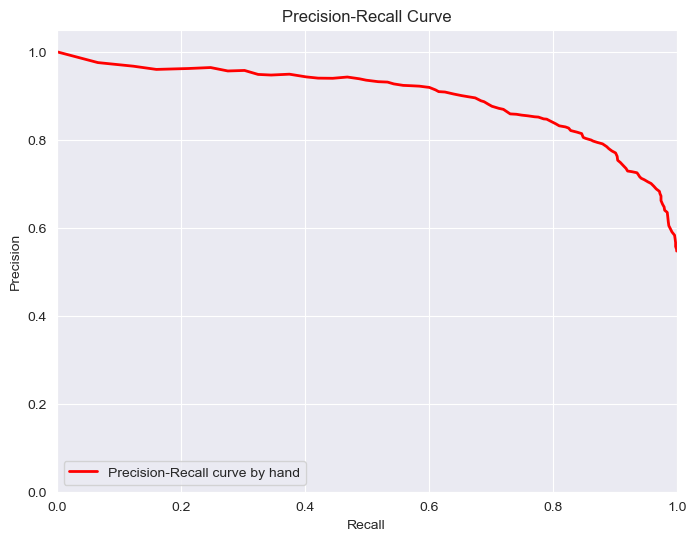

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные (замените на свои значения)
y_real = y_test

# Инициализация списков для значений Precision и Recall
precision_list = []
recall_list = []
th = []
# Генерируем пороги от 1 до 0
thresholds = np.linspace(1, 0, num=100)

# Вычисляем Precision и Recall для разных порогов
for threshold in thresholds:
    predicted_positive = np.sum(y_pred >= threshold)
    predicted_negative = np.sum(y_pred < threshold)
    th.append(threshold)
    actual_positive = np.sum(y_real)
    actual_negative = len(y_real) - actual_positive

    precision = np.sum((y_real == 1) & (y_pred >= threshold)) / predicted_positive if predicted_positive != 0 else 0
    recall = np.sum((y_real == 1) & (y_pred >= threshold)) / actual_positive if actual_positive != 0 else 0

    precision_list.append(precision)
    recall_list.append(recall)
    #print(precision_list, recall_list)
# Создаем график Precision-Recall

# print(recall_list)
# print(precision_list)
precision_list[0] = 1

plt.figure(figsize=(8, 6))
plt.plot(recall_list, precision_list, color='r', lw=2, label='Precision-Recall curve by hand')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower left')
plt.show()


In [51]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [52]:
pr, re, thres = precision_recall_curve(y_test, y_pred)

In [53]:
# посмотрим что получилось
for line in zip(pr[:10], re[:10], thres[:10]):
    print(line)

(0.5507649513212796, 1.0, 0.011197089366209475)
(0.550556586270872, 0.9991582491582491, 0.012125206039678706)
(0.5508120649651972, 0.9991582491582491, 0.012320444780881396)
(0.5510677808727948, 0.9991582491582491, 0.012923135847062612)
(0.5513237343241988, 0.9991582491582491, 0.013039601024988263)
(0.5515799256505576, 0.9991582491582491, 0.013112663640635555)
(0.5518363551836355, 0.9991582491582491, 0.013403221853316077)
(0.552349930200093, 0.9991582491582491, 0.013731026336289705)
(0.5526070763500931, 0.9991582491582491, 0.013785331390762694)
(0.5528644620400559, 0.9991582491582491, 0.013864590306974353)


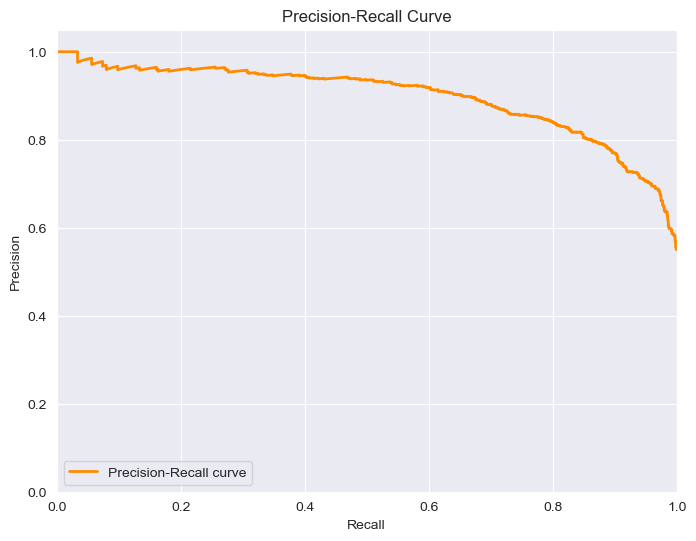

In [54]:
# Создаем график Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(re, pr, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower left')
plt.show()

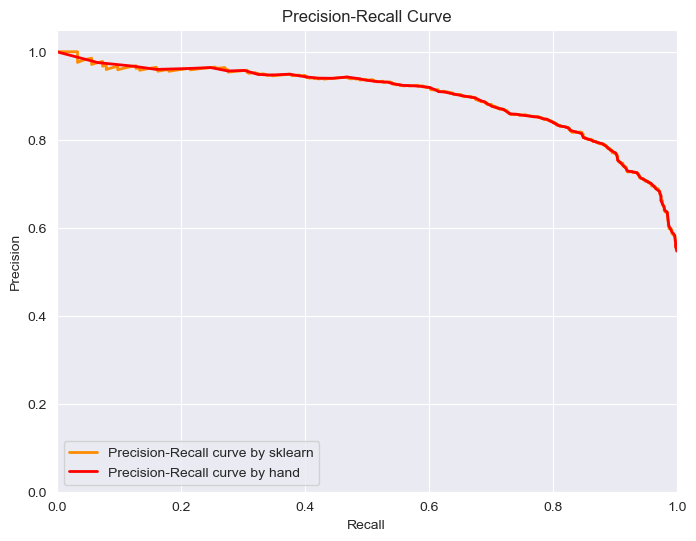

In [55]:
# Создаем график Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(re, pr, color='darkorange', lw=2, label='Precision-Recall curve by sklearn')
plt.plot(recall_list, precision_list, color='r', lw=2, label='Precision-Recall curve by hand')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower left')
plt.show()

In [56]:
auc = round(abs(np.trapz(tpr, fpr)), 4)

In [57]:
auc

0.886

In [63]:
auc_pr = round(abs(np.trapz(pr, re)), 4)

In [64]:
auc_pr

0.8977